# Scraping reports 

In [1]:
# Imports for scraping
from WebScraping.Scraper import extract_reports_mp

In [2]:
#Extracting 30 reports for Delhi and Mumbai each.
extract_reports_mp(city_list=['Delhi','Mumbai'], report_count=30)


Extracting reports of the city Delhi
Extracting reports of the city Mumbai

 Reports location : ./reports
location mapping : location_mapping.csv


# Preparing data for labelling

In [3]:
# Imports for preparing data
from Utilities.utils import prepare_labelling_data

In [4]:
prepare_labelling_data(report_folder = 'reports')

reports/Mumbai_report_6.txt is in different language
Output written to reports_for_labelling.txt


# Labelling reports for 'Issues', 'Timestamp', 'Address', 'Duration in Doccano

## Creating a project

## Creating labels

## Uploading the text file.
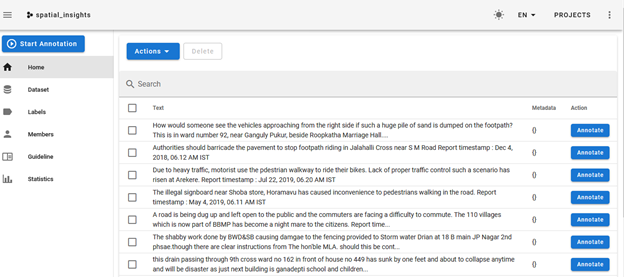

## Annotating reports

## Exporting labelled data

# Training Spacy Entity recognition model.

In [7]:
# Imports for model training
from NER.NamedEntityRecognizer import prepare_data, NamedEntityRecognizer

In [8]:
# Data Preperation
data = prepare_data('/home/parinyas/DEMO/train_data.json')

In [9]:
# Instantiating an empty model
model = NamedEntityRecognizer(data)

In [8]:
#Training the model
model.train(epochs=2)

epoch,loss,f1,precision,recall
0,9788.0,43.08,100.0,27.45
1,8327.63,31.15,66.67,20.32


In [9]:
model.save('model_2E')

Model has been saved to models/model_2E


In [10]:
# Loading a pretrained model
model.load('Model/model_100E')

Model loaded successfully


## Extraction on bulk reports

In [11]:
df = model.extract_entities('reports','location_mapping.csv').head(50)

In [13]:
df.head()

,filename,location,Duration,Address,Issue,TimeStamp
filename,,,,,,
Delhi_report_0.txt,Delhi_report_0.txt,"Mayur Vihar Three,New Kondli road,East Delhi",[],"[Salwan Public School, Mayur Vihar]",[lying forgotten on the footpath],"[Sep 23, 2020, 06.02 AM IST]"
Delhi_report_1.txt,Delhi_report_1.txt,"opp Venkateswara College, satya niketan,satya ...",[],[Satya Niketan],"[filled with 3 feet of water, mosquitoes breed...","[Sep 23, 2020, 06.02 AM IST]"
Delhi_report_2.txt,Delhi_report_2.txt,"Munirka,nelson mandela marg,New delhi",[],[Vasant Vihar Police Station],[],"[Sep 23, 2020, 06.02 AM IST]"
Delhi_report_3.txt,Delhi_report_3.txt,"Unnamed Road, Hari Enclave, Hari Nagar, New De...",[],[Rohtak Road was overcrowded],[],"[Sep 23, 2020, 06.02 AM IST]"
Delhi_report_4.txt,Delhi_report_4.txt,"B 127, Pocket A, Okhla Phase I, Okhla Industri...",[],"[Okhla Industrial Area, Phase-1, DDA]",[],"[Sep 23, 2020, 06.01 AM IST]"


# Geo-coding

In [2]:
#Imports for geo-coding
import os
from Utilities.extract_location import add_coordinate_info

In [12]:
#Adding lat long data
df = add_coordinate_info(df,api_key = os.getenv('GMAP_API_KEY'))

In [16]:
df.head()

,filename,location,Duration,Address,Issue,TimeStamp,long,lat
0,Delhi_report_0.txt,"Mayur Vihar Three,New Kondli road,East Delhi",[],"[Salwan Public School, Mayur Vihar]",[lying forgotten on the footpath],"[Sep 23, 2020, 06.02 AM IST]",77.336435,28.602367
1,Delhi_report_1.txt,"opp Venkateswara College, satya niketan,satya ...",[],[Satya Niketan],"[filled with 3 feet of water, mosquitoes breed...","[Sep 23, 2020, 06.02 AM IST]",77.167187,28.587732
2,Delhi_report_2.txt,"Munirka,nelson mandela marg,New delhi",[],[Vasant Vihar Police Station],[],"[Sep 23, 2020, 06.02 AM IST]",77.167481,28.555967
3,Delhi_report_3.txt,"Unnamed Road, Hari Enclave, Hari Nagar, New De...",[],[Rohtak Road was overcrowded],[],"[Sep 23, 2020, 06.02 AM IST]",77.113453,28.629870
4,Delhi_report_4.txt,"B 127, Pocket A, Okhla Phase I, Okhla Industri...",[],"[Okhla Industrial Area, Phase-1, DDA]",[],"[Sep 23, 2020, 06.01 AM IST]",77.276386,28.528490


# Post processing

In [17]:
#Imports
from Utilities.utils import post_process_results

In [18]:
df = post_process_results(df, report_path='reports/')

In [19]:
df.tail()

,filename,location,Duration,Address,Issue,TimeStamp,long,lat
20,Mumbai_report_10.txt,"Bandra West,St Leo Road,Mumbai",,Kane Road,Bandra Fair year long,"Nov 16, 2020, 06.06 AM IST",72.827404,19.058104
21,Mumbai_report_11.txt,"zaveri bazaar Opp ICICI Bank ,zaveri Bazaar Sh...",,,gathering for garbage dumping facility,"Nov 15, 2020, 06.01 AM IST",72.826151,18.948245
22,Mumbai_report_12.txt,"B-14, Milat Nagar, Andheri West, Mumbai, Mahar...",,Millay nagar,"perfect condition but still the piles, encroac...","Nov 13, 2020, 06.03 AM IST",72.827223,19.152260
23,Mumbai_report_16.txt,"Ali Talao Road near Navjeevan Society, Malad, ...",,"Marve, Malad (west)",signboard causing loss of important footage,"Nov 13, 2020, 06.01 AM IST",72.818417,19.192893
24,Mumbai_report_17.txt,"Andheri,Barfiwala Flyover,Mumbai",,Barfiwala Flyover,littered with construction material,"Nov 12, 2020, 06.03 AM IST",72.843377,19.116241


In [20]:
import pandas as pd
df = pd.read_csv(r'Data/big_file.csv',index_col = 0) #Reading the big file

In [21]:
df.tail()

,filename,location,long,lat,Issue,Duration,TimeStamp
9561,pune_report_2003.txt,"somwar peth,near apollo theater,pune",73.864754,18.519668,People residing on footpath,Not found,"Feb 20, 2018, 06.08 AM IST"
9562,pune_report_2004.txt,"Westend mall Aundh,Wireless colony Road,Aundh ...",73.806919,18.561618,"garbage menace, vote banks",Not found,"Feb 20, 2018, 06.02 AM IST"
9563,pune_report_2006.txt,"Near Katraj Chowk Pmp stop ,Satara Road Katraj...",73.858125,18.457994,"Footpaths are for people, commuters with two w...",Not found,"Feb 19, 2018, 06.18 AM IST"
9564,pune_report_2007.txt,"Naylor Rd, Atur Park Co-operative Housing Soci...",73.884561,18.533953,severe inconvenience to public,Not found,"Feb 19, 2018, 06.17 AM IST"
9565,pune_report_2008.txt,"77/2D, Chandrabhaga Nagar, Dhankawadi, Pune, M...",73.852807,18.455827,"Unused Car has been Parked here for almost, di...",a Year,"Feb 19, 2018, 06.11 AM IST"


# Mapping

In [22]:
# Imports for mapping
from Utilities.mapping import plot_map, plot_heat_map

In [23]:
# Point data on map
m = plot_map(df, 28.6519500, 77.2314900, 'Delhi',
         report_path=r'/mnt/c/Users/Parinyas/Documents/GitHub/Extracted_reports/', issue_col='Issue')
m.save(r'/mnt/c/Users/Parinyas/Desktop/output_maps/delhi.html') # Saving the output map
m

In [25]:
# Point data on map
m1 = plot_map(df, 28.6519500, 77.2314900, 'Delhi', search_term='mosquito' ,
         report_path=r'/mnt/c/Users/Parinyas/Documents/GitHub/Extracted_reports/', issue_col='Issue')
m1.save(r'/mnt/c/Users/Parinyas/Desktop/output_maps/delhi_mosquito.html') # Saving the output map
m1

In [26]:
#Heatmap
m2 = plot_heat_map(df, 28.6519500, 77.2314900, 'Delhi', zoom_start=10)
m2.save(r'/mnt/c/Users/Parinyas/Desktop/output_maps/delhi_heat_map.html')
m2